In [ ]:
# 서포트 벡터 머신(SVM)은 강력한 분류, 회귀 및 이상 탐지 모델

from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np

# 1. 데이터 준비
iris = load_iris(as_frame=True) # Iris 데이터셋을 로드하고 판다스 데이터프레임 형식으로 반환

# 꽃잎의 길이와 너비(petal length, petal width)를 사용하여 분류 문제를 해결
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

# 2. 클래스 필터링
# 이진 분류를 수행. Iris Setosa(클래스 0)와 Iris Versicolor(클래스 1)만 필터링
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor] # setosa_or_versicolor: y에서 클래스 0(Setosa) 또는 클래스 1(Versicolor)인 값을 선택하는 논리적 조건
y = y[setosa_or_versicolor]


# 3. SVM 모델 정의 및 학습
svm_clf = SVC(kernel="linear", C=1) # 선형 커널을 사용하여 데이터를 분류. 즉, 두 클래스를 분리하는 직선(결정 경계)을 학습 / c는 규제 하이퍼파라미터
svm_clf.fit(X, y)

print("Support Vectors:", svm_clf.support_vectors_)
# 서포트 벡터는 결정 경계(직선)와 가장 가까운 데이터 포인트들 -> 결정 경계에 가장 큰 영향을 미치는 데이터 포인트들의 좌표

Support Vectors: [[1.9 0.4]
 [3.  1.1]]


In [ ]:
# 비선형 SVM 분류
# 선형적으로 분리되지 않는 데이터를 처리하기 위해 커널 기법을 사용
# 일반적으로 사용되는 커널: 다항식 커널, RBF(가우시안) 커널

from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 1. 비선형 데이터셋 생성
# make_moons -> 비선형 분포를 가진 반달 모양의 데이터를 생성
# noise=0.15: 데이터에 약간의 노이즈를 추가하여 더 현실적인 분포를 만듦
# random_state=42: 난수 시드 고정
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# 2. SVM 모델 구성 및 학습
svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=0.001)) # RBF(Radial Basis Function) 커널을 사용 / gamma=5 -> RBF 커널의 하이퍼파라미터로, 데이터 포인트의 영향 범위를 조정
svm_clf.fit(X, y)

print("SVM RBF Kernel Support Vectors:", svm_clf[-1].support_)

SVM RBF Kernel Support Vectors: [ 3  4  5  6  8  9 10 11 13 15 18 19 22 23 25 26 28 30 31 33 35 38 39 40
 41 42 44 45 47 49 50 51 52 53 54 56 58 63 66 71 73 77 82 83 84 86 87 88
 94 97  0  1  2  7 12 14 16 17 20 21 24 27 29 32 34 36 37 43 46 48 55 57
 59 60 61 62 64 65 67 68 69 70 72 74 75 76 78 79 80 81 85 89 90 91 92 93
 95 96 98 99]


In [ ]:
# SVM 회귀

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(50, 1) # [0,2] 구간에서 균일한 분포를 가진 50개의 랜덤 샘플
# 각 샘플 X에 대해 선형 관계를 기반으로 타깃값 y 생성, 여기에 정규분포 N(0,1)에서 생성된 노이즈 추가
y = 4 + 3 * X[:, 0] + np.random.randn(50)

# make_pipeline -> 데이터 전처리(표준화)와 SVR 모델을 하나의 파이프라인으로 묶음
# StandardScaler -> 각 특성을 평균 0, 표준편차 1로 표준화
# epsilon=0.1 -> 예측값과 실제 값의 차이가 e 이내라면, 해당 데이터 포인트에 대한 손실을 무시
svm_reg = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=2, C=10, epsilon=0.1))
svm_reg.fit(X, y)

print("SVR Predictions:", svm_reg.predict(X[:5]))

SVR Predictions: [6.65551825 7.23838276 6.83463758 6.69807393 6.83979358]


특성 이름: ['petal length (cm)', 'petal width (cm)']
타깃 이름: ['setosa', 'versicolor']
데이터 크기: (100, 2)
지원 벡터(Support Vectors):
[[1.9 0.4]
 [3.  1.1]]


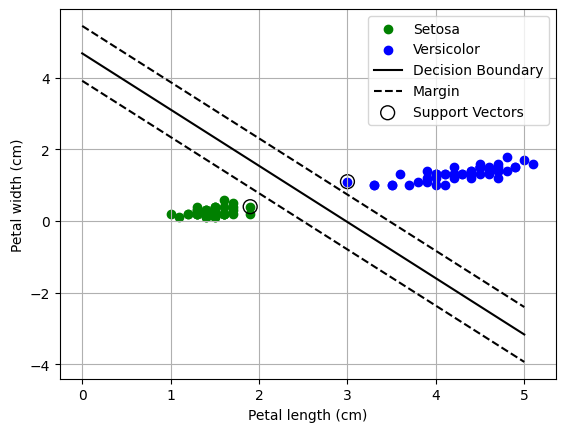

In [ ]:
# 과제 <Iris 데이터셋에서 Iris Setosa와 Iris Versicolor를 분류하는 선형 SVM 모델을 학습하고, 결정 경계를 시각화>
# 1. 데이터 준비
from sklearn import datasets
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length, Petal width 선택
y = iris.target

# Iris Setosa와 Iris Versicolor 클래스만 선택
setosa_versicolor = (y == 0) | (y == 1)
X = X[setosa_versicolor]
y = y[setosa_versicolor]

# 타겟 이름 변경 (0: setosa, 1: versicolor)
y = np.where(y == 0, 0, 1)

print(f"특성 이름: {iris.feature_names[2:4]}")
print(f"타깃 이름: {[iris.target_names[0], iris.target_names[1]]}")
print(f"데이터 크기: {X.shape}")


# 2. 모델 학습
model = SVC(kernel="linear")
model.fit(X, y)

# 지원 벡터 출력
print("지원 벡터(Support Vectors):")
print(model.support_vectors_)


# 3. 결정 경계 시각화
# 데이터 산점도
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='green', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Versicolor')

# 결정 경계 그리기
w = model.coef_[0]
b = model.intercept_[0]
x_boundary = np.linspace(0, 5, 100)
decision_boundary = -(w[0] * x_boundary + b) / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))
upper_margin = decision_boundary + margin
lower_margin = decision_boundary - margin

plt.plot(x_boundary, decision_boundary, "k-", label="Decision Boundary")
plt.plot(x_boundary, upper_margin, "k--", label="Margin")
plt.plot(x_boundary, lower_margin, "k--")

# 지원 벡터 표시
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    facecolors='none',
    edgecolors='black',
    label="Support Vectors"
)

# 그래프 꾸미기
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.grid()
plt.show()
